# Ultimate Inc. Challenge

The data is available as two attached CSV files: takehome_user_engagement. csv takehome_users . csv The data has the following two tables:

    1. A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years. This  table includes:
    • name: the user's name
    • object_id: the user's id
    • email: email address
    • creation_source: how their account was created. This takes on one of 5 values:
        * PERSONAL_PROJECTS: invited to join another user's personal workspace
        * GUEST_INVITE: invited to an organization as a guest (limited permissions)
        * ORG_INVITE: invited to an organization (as a full member)
        * SIGNUP: signed up via the website
        * SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
    • creation_time: when they created their account
    • last_session_creation_time: unix timestamp of last login
    • opted_in_to_mailing_list: whether they have opted into receiving marketing emails
    • enabled_for_marketing_drip: whether they are on the regular marketing email drip
    • org_id: the organization (group of users) they belong to
    • invited_by_user_id: which user invited them to join (if applicable).
    
    2. A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.
    Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period,     identify which factors predict future user adoption .

We suggest spending 12 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Ploting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

## Load Data

### User engagement data

In [2]:
df_engagement = pd.read_csv(r'C:\Users\dshaw\Springboard\Ultimate Technologies Inc\takehome_user_engagement.csv')
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
# Calculate the number of unique users and total login
print('There were {} users and a total of {} logins'.format(
    df_engagement['user_id'].nunique(), len(df_engagement)))

There were 8823 users and a total of 207917 logins


In [5]:
# Convert 'time_stamp' into datetime format
df_engagement['time_stamp'] = pd.to_datetime(
    df_engagement['time_stamp'], format='%Y-%m-%d %H:%M:%S')
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [7]:
# define a function to see if a user logged in on 3 seperate days in a 7-day period.
def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    # first drop duplicate days and sort by day
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    # calculate how many days has passed for every 3 logins
    passed_days = df['date'].diff(periods=logins-1)
    # check if any passed time is less than 7 days
    return any(passed_days <= timedelta(days=days))

In [8]:
# check if a user has logged in on 3 separate days within a 7-day period
def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    
    # Ensure time_stamp is in datetime format and create 'date' column for day-based calculations
    df['date'] = df['time_stamp'].dt.date
    
    # Drop duplicates based on 'date' and sort by date
    df = df.drop_duplicates(subset='date').sort_values('date')
    
    # Loop through the data to check every window of 'logins' (3) for the time difference
    for i in range(len(df) - logins + 1):
        # Calculate the difference between the first and the last date of the selected logins period
        diff = (df['date'].iloc[i + logins - 1] - df['date'].iloc[i])
        
        # If the difference is less than or equal to 'days' (7), return True (i.e., the user has 3 logins in the period)
        if diff <= timedelta(days=days):
            return True
    
    # If no such period is found, return False
    return False

In [9]:
# Run the function on all users
adopted = df_engagement.groupby('user_id').apply(logins_in_days)

# Assign the result to a new column 'adopted_user' in the DataFrame
adopted.name = 'adopted_user'

# Optionally, join the result back to the original DataFrame
df_engagement = df_engagement.merge(adopted, on='user_id', how='left')


In [10]:
# Print the number of adopted users out of total users
print('There were {} adopted users out of {} users'.format(
    sum(adopted), len(adopted)))


There were 1656 adopted users out of 8823 users


### User data

In [11]:
df_users = pd.read_csv(r'C:\Users\dshaw\Springboard\Ultimate Technologies Inc\takehome_users.csv')

In [12]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [13]:
# drop coloumns that arent useful 
df_users = df_users.drop(columns=['name', 'email'])
df_users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [14]:
# Get the top 5 organizations with the most users
top_users_orgs = df_users['org_id'].value_counts().head()

# Display the result
print(top_users_orgs)

org_id
0    319
1    233
2    201
3    168
4    159
Name: count, dtype: int64


In [15]:
# Get the top 5 users with the most invites
top_5_invitors = df_users['invited_by_user_id'].value_counts().head()

# Display the result
print(top_5_invitors)

invited_by_user_id
10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
Name: count, dtype: int64


In [16]:
# Drop columns in-place
df_users.drop(['org_id', 'invited_by_user_id'], axis=1, inplace=True)

In [17]:
df_users.head

<bound method NDFrame.head of        object_id    creation_time     creation_source  \
0              1   4/22/2014 3:53        GUEST_INVITE   
1              2  11/15/2013 3:45          ORG_INVITE   
2              3  3/19/2013 23:14          ORG_INVITE   
3              4   5/21/2013 8:09        GUEST_INVITE   
4              5  1/17/2013 10:14        GUEST_INVITE   
...          ...              ...                 ...   
11995      11996    9/6/2013 6:14          ORG_INVITE   
11996      11997  1/10/2013 18:28  SIGNUP_GOOGLE_AUTH   
11997      11998  4/27/2014 12:45        GUEST_INVITE   
11998      11999  5/31/2012 11:55   PERSONAL_PROJECTS   
11999      12000   1/26/2014 8:57              SIGNUP   

       last_session_creation_time  opted_in_to_mailing_list  \
0                    1.398139e+09                         1   
1                    1.396238e+09                         0   
2                    1.363735e+09                         0   
3                    1.369210e+09

By using the creation time and last session time, we can create two valuable features. The history of software usage may influence the likelihood of becoming an "adopted user." Specifically, users who have been using the software for a longer period are more likely to become adopted users compared to those who have just signed up. Additionally, since the adoption rate can vary over time, examining the account age (based on the creation time) can provide further insights.

In [18]:
# Convert both time features into datetime format with the correct format
df_users['creation_time'] = pd.to_datetime(df_users['creation_time'], format='%m/%d/%Y %H:%M')
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'], unit='s')

# Calculate user history: number of days between account creation and last use
df_users['history'] = df_users['last_session_creation_time'] - df_users['creation_time']
df_users['history'] = df_users['history'].dt.days  # Extract number of days

# Calculate account age: number of days since account creation and now
# Use the latest creation time in the dataset to represent the current date
latest = max(df_users['creation_time'])
df_users['account_age'] = latest - df_users['creation_time']
df_users['account_age'] = df_users['account_age'].dt.days  # Extract number of days

# Drop the original 'creation_time' and 'last_session_creation_time' columns as they are no longer needed
df_users = df_users.drop(['creation_time', 'last_session_creation_time'], axis=1)


In [19]:
df_users.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,history,account_age
0,1,GUEST_INVITE,1,0,0.0,38
1,2,ORG_INVITE,0,0,136.0,196
2,3,ORG_INVITE,0,0,0.0,437
3,4,GUEST_INVITE,0,0,1.0,374
4,5,GUEST_INVITE,0,0,5.0,498


In [20]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   history                     8823 non-null   float64
 5   account_age                 12000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 562.6+ KB


According to the challenge description, 8,823 users had 'user history' out of a total of 12,025 users. The challenge description did not clarify whether the remaining users' data was missing or nonexistent. However, since some users have a history of 0 days, I suspect the engagement data for these users is simply missing. Therefore, I will not analyze these users."

In [21]:
# Set the index of df_users to 'object_id' and rename it to 'user_id'
df_users = df_users.set_index('object_id')
df_users.index.name = 'user_id'

# Concatenate df_users and adopted Series on the 'user_id' index, keeping only the rows present in both DataFrames
data = pd.concat([df_users, adopted], axis=1, join='inner')

# Convert the 'adopted_user' column to integers
data['adopted_user'] = data['adopted_user'].astype(int)

# Display the resulting DataFrame
print(data.head())


        creation_source  opted_in_to_mailing_list  enabled_for_marketing_drip  \
user_id                                                                         
1          GUEST_INVITE                         1                           0   
2            ORG_INVITE                         0                           0   
3            ORG_INVITE                         0                           0   
4          GUEST_INVITE                         0                           0   
5          GUEST_INVITE                         0                           0   

         history  account_age  adopted_user  
user_id                                      
1            0.0           38             0  
2          136.0          196             1  
3            0.0          437             0  
4            1.0          374             0  
5            5.0          498             0  


## Exporatory Data Analysis (EDA)

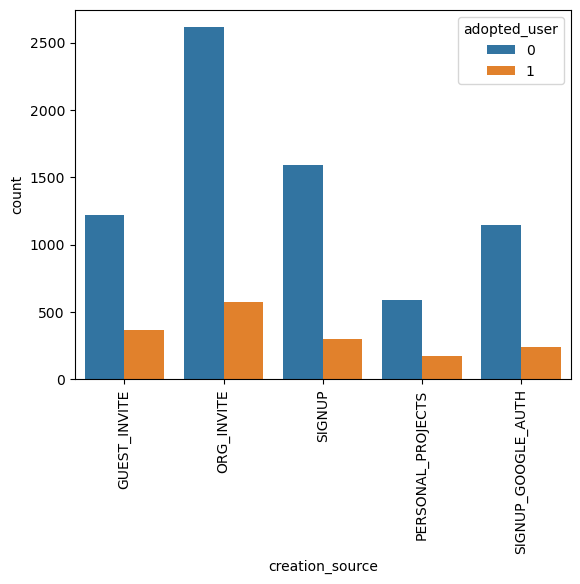

In [22]:
# Create a countplot for the 'creation_source' column with hue based on 'adopted_user'
_ = sns.countplot(x='creation_source', data=data, hue='adopted_user')

# Rotate x-axis labels for better readability
_ = plt.xticks(rotation=90)

# Show the plot
plt.show()

In [23]:
from scipy.stats import chi2_contingency

# Create a crosstab of 'creation_source' and 'adopted_user'
crosstab = pd.crosstab(data['creation_source'], data['adopted_user'])

# Perform the Chi-squared test
results = chi2_contingency(crosstab)

# Print the test statistic (chi2) and the p-value
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 41.27933208242451	p = 2.3526508745340972e-08


In [24]:
# Calculate the proportion of adopted users for each 'creation_source'
adopted_proportion = data.groupby('creation_source')['adopted_user'].apply(lambda x: sum(x) / len(x))

# Display the result
print(adopted_proportion)


creation_source
GUEST_INVITE          0.232368
ORG_INVITE            0.180050
PERSONAL_PROJECTS     0.225131
SIGNUP                0.159115
SIGNUP_GOOGLE_AUTH    0.172563
Name: adopted_user, dtype: float64


The "adopted user" rate in guest_invite and personal_projects is understandable because users who received invites were likely collaborating with others, and those with personal projects probably have a stronger personal interest, which makes them more engaged.


In [25]:
# Calculate the proportion of adopted users for each 'opted_in_to_mailing_list' group
data.groupby('opted_in_to_mailing_list')['adopted_user'].apply(lambda x: sum(x) / len(x))

opted_in_to_mailing_list
0    0.185994
1    0.192722
Name: adopted_user, dtype: float64

In [26]:
from statsmodels.stats.weightstats import CompareMeans

# Define the z-test function
def z_test(df, col, target='adopted_user'):
    # Split the data into two groups based on the column value (1 or 0)
    opted_in = df.loc[df[col] == 1, target]
    opted_out = df.loc[df[col] == 0, target]
    
    # Create a CompareMeans object from the two groups
    z_data = CompareMeans.from_data(opted_in, opted_out)
    
    # Perform the z-test
    z, p = z_data.ztest_ind()
    
    # Print the results
    print(f'For {col}, z = {z}, p = {p}')

# Run the z-test on 'opted_in_to_mailing_list' column
z_test(data, 'opted_in_to_mailing_list')


For opted_in_to_mailing_list, z = 0.7029779128148235, p = 0.4820695142048762


In [27]:
# Calculate the proportion of adopted users for each 'enabled_for_marketing_drip' group
data.groupby('enabled_for_marketing_drip')['adopted_user'].apply(lambda x: sum(x) / len(x))


enabled_for_marketing_drip
0    0.186982
1    0.191648
Name: adopted_user, dtype: float64

In [28]:
# Run the z-test on 'enabled_for_marketing_drip' column
z_test(data, 'enabled_for_marketing_drip')

For enabled_for_marketing_drip, z = 0.40292649500940264, p = 0.6870022995069656


There was essentially no difference between users who signed up for the mailing list and marketing drip and those who did not.

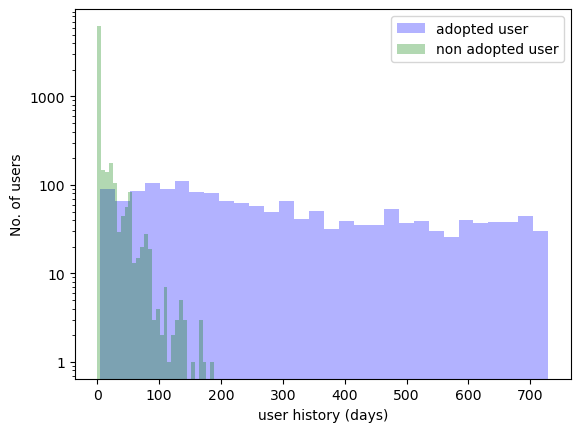

In [29]:
# Define the function to plot the histogram
def plot_hist_days(df, col, xlabel):
    # Plot histogram for adopted users (adopted_user == 1)
    plt.hist(df.loc[df['adopted_user'] == 1, col], 
             bins=30, alpha=0.3, color='b', label='adopted user')
    
    # Plot histogram for non-adopted users (adopted_user == 0)
    plt.hist(df.loc[df['adopted_user'] == 0, col], 
             bins=30, alpha=0.3, color='g', label='non adopted user')
    
    # Set log scale for the y-axis
    plt.yscale('log')
    
    # Add legend
    plt.legend()
    
    # Label the x and y axes
    plt.xlabel(xlabel)
    plt.ylabel('No. of users')
    
    # Set custom y-ticks for better visibility
    plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])
    
    # Show the plot
    plt.show()

# Call the function to plot user history
plot_hist_days(data, 'history', 'user history (days)')

Users with long history are more likely to be adopted users.

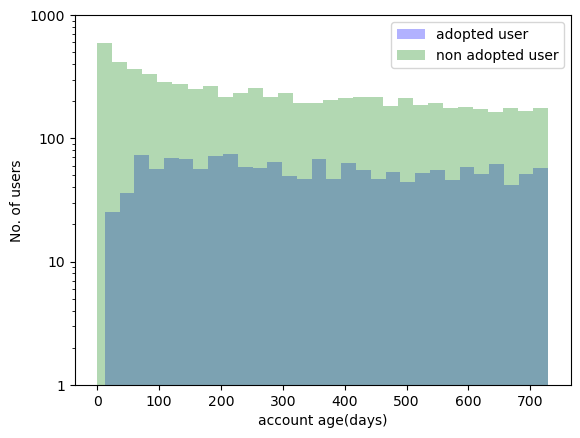

In [30]:
plot_hist_days(data, 'account_age', 'account age(days)')

The adoption rate is lower for very new accounts. Aside from that, there hasn't been much change in the adoption rate over the past two years.

## Predictive Modeling

In [31]:
from sklearn.model_selection import train_test_split

# Create dummy variables for the 'creation_source' column (categorical feature)
creation_source = pd.get_dummies(data['creation_source'], drop_first=True)

# Combine the dummy variables with the original dataset and drop the original 'creation_source' column
model_data = pd.concat([data, creation_source], axis=1).drop('creation_source', axis=1)

# Define the target variable (y) and features (X)
y = model_data['adopted_user']  # Target: whether the user is adopted (1 or 0)
X = model_data.drop('adopted_user', axis=1)  # Features: all other columns except 'adopted_user'

# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, stratify=y, random_state=42
)


### Random forest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Classifier with balanced class weights
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the hyperparameters for tuning (number of estimators/trees in the forest)
params = {'n_estimators': [10, 50, 100, 200]}

# Use GridSearchCV to search for the best number of estimators based on cross-validation performance
model = GridSearchCV(clf, params)

# Fit the model to the training data
model.fit(Xtrain, ytrain)

# Print the best parameters and the best average precision score from cross-validation
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'n_estimators': 200}
Best average precision was 0.9622190937469315


In [33]:
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier with balanced class weights and 100 estimators
model = RandomForestClassifier(
    random_state=42, class_weight='balanced', n_estimators=100
)

# Fit the model on the training data
model.fit(Xtrain, ytrain)

# Predict the labels for the test set
ypred = model.predict(Xtest)

# Calculate and print accuracy score on the test set
print('Accuracy of test set was', accuracy_score(ytest, ypred))

# Print the classification report for more detailed performance metrics
print(classification_report(ytest, ypred))


Accuracy of test set was 0.9524025385312783
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1792
           1       0.89      0.86      0.87       414

    accuracy                           0.95      2206
   macro avg       0.93      0.92      0.92      2206
weighted avg       0.95      0.95      0.95      2206



In [34]:
# Get the feature importances from the trained model
feature_imp = pd.Series(model.feature_importances_, index=X.columns)

# Sort the feature importances in descending order
feature_imp = feature_imp.sort_values(ascending=False)

# Print the sorted feature importances
print(feature_imp)

history                       0.896215
account_age                   0.088288
opted_in_to_mailing_list      0.003251
SIGNUP                        0.003185
enabled_for_marketing_drip    0.002760
ORG_INVITE                    0.002308
PERSONAL_PROJECTS             0.002092
SIGNUP_GOOGLE_AUTH            0.001901
dtype: float64


It's evident that user history is the most significant factor for adopted users. To take advantage of this, encouraging users to stay engaged and log in after they've had their accounts for a while could be an effective way to increase users.

The next most important factor is how users sign up. When you look at the different sign-up methods, guest invitations and personal projects stand out as having the highest adoption rates. So, getting users to invite others and incentivizing them to work on personal projects could be a good strategy to increase adoption.

Account age matters a bit, but there’s not much we can do to influence that.

On the other hand, things like mailing list sign-ups and marketing drips don’t seem to make much of a difference in terms of adoption.